# Rules
* Internet and Books are ALLOWED
* Name your file as following: StudentID_ChineseName/EnglishName_quiz#
* Extension of your file or your file type should be .py

# Logistic regression
- Using logistic regression predicting on MNIST database with multiple classes.

## Part I

Use the MNIST data

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml(data_id=554)

Split into training and test with sklearn

-Training dataset(60000,784) . Test dataset(10000,784)


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=1/7)
print(f"Training dataset: {X_train.shape}, Test dataset: {X_test.shape}")

Training dataset: (60000, 784), Test dataset: (10000, 784)


Use logistic model from sklearn. 
* Set the max_iteration to 1000.
* Set n_jobs to 5.

In [22]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000, n_jobs=5)
clf = clf.fit(X_train, y_train)

/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Predict the model using test data. Check the accuracy by comparing the prediction with the label. **Remember to use test data, not train data!!**
The result can be in **the scale of 0 to 1** or **percentage (%)**.

In [24]:
import numpy as np
y_pred = clf.predict(X_test)
acc = np.sum(y_pred == y_test) / len(y_pred)
print(f'Accuracy: {acc}')

Accuracy: 0.9131


Show the confusion matrix. Check **metrics from sklearn** for confusion matrix!

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 961    0   10    3    2    5    9    3    4    0]
 [   0 1111   11    8    0    9    0    3   10    4]
 [   4   13  859   28   10    6   18   15   23    4]
 [   7    2   20  910    2   35    5   10   16    9]
 [   5    3    7    1  933    2    8    8    8   29]
 [  13    3    7   26   13  792   14    6   40   10]
 [   8    2   13    1   10   13  909    1    7    0]
 [   1    6   16    6   13    0    0  970    4   38]
 [   5   16    9   23    9   29    8    3  813   10]
 [   4    5    5   16   29    7    0   30   11  873]]


Using seaborn to visualize the confusion matrix

Text(0.5, 1.0, 'Accuracy Score: 0.9131')

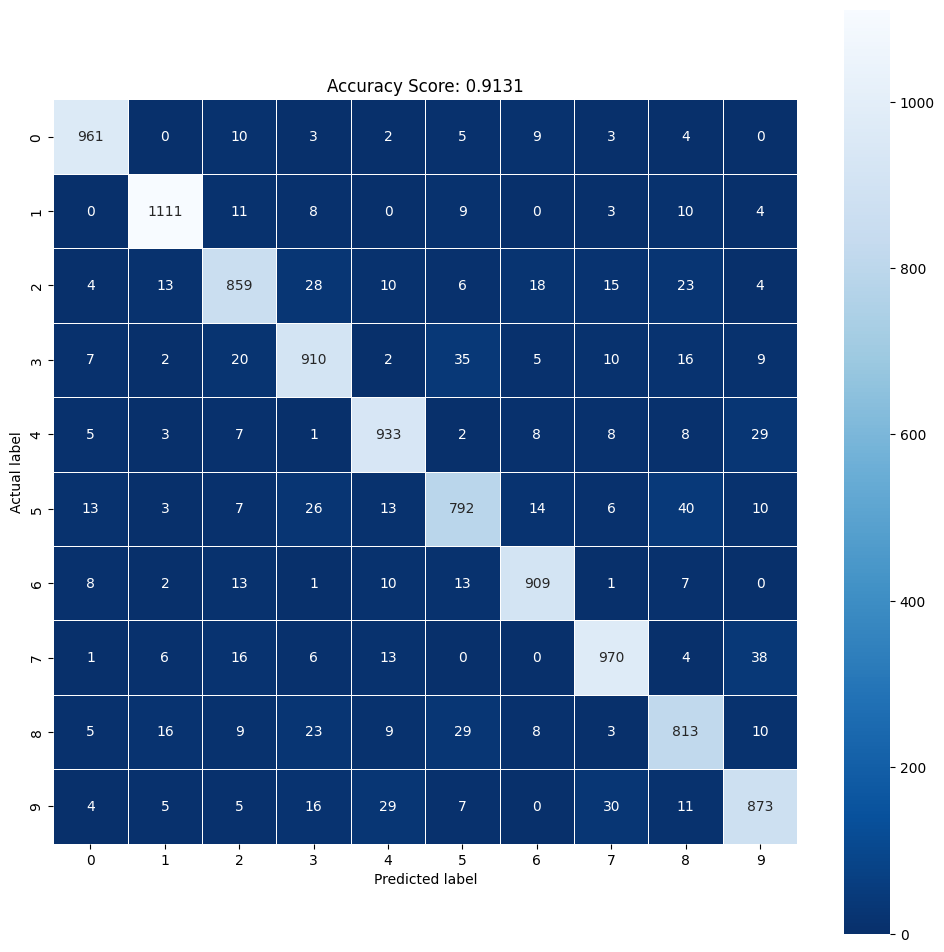

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r', fmt='0.4g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(acc)
plt.title(all_sample_title)